# Lab 11: ODEs, Failure Rates, and Evolutionary Games

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
from scipy.integrate import odeint
print ('Modules Imported!')

Modules Imported!


In this lab we're to going analyze evolutionary games using drift analysis. In order to do this, we first need to determine how to integrate ordinary differential equations. So, we begin with a brief exposure of how to achieve this in Python. While we're at it, we'll do a short exercise about failure rate functions.  Then we examine some evolutionary games, using both a stochastic model and a deterministic model, which involves the differential equations.

## Integration of ODEs

This section gives an introdution to integrating ordinary differential equations (odes), with an application to the calculation of a CDF from a failure rate function.  If you recall from your math classes we can describe an ODE as the following:

$\dot{y}=f(y),$ 

where both $y$ and the function $f$ are vector valued, and $\dot{y}$ is shorthand for $\frac{dy}{dt}.$   The variables being vector valued simply implies that we could have a system of dependent one dimensional (1D) ODEs as opposed to just a single one dimensional variable.  Let's look at the following system:

\begin{eqnarray*}
\binom{\dot{y_0}}{\dot{y_1}} = \binom{2y_1-0.1y_0}{-y_0}
\end{eqnarray*}
with the initial condition $y_{init}=\binom{y_1(0)}{y_2(0)}=\binom{1}{1}.$

Our goal in using Python is not to find a closed form solution to the ODE as you would have probably done in your math class, but to numerically integrate it and produce a graphical solution. In order to do this we use the odeint method from scipy.integrate. It takes a function with an initial value and specified times at which the solution is to be output. Internally, the numerical method will often use a much finer grid of time points to solve the ode -- but that is none of your concern.   The times you put in are the times at with the method needs to provide the values of the solution. Look how it is used below:

Text(0.5, 0, 'y_0')

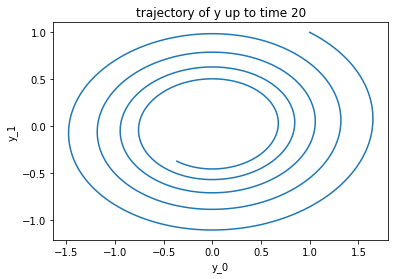

In [8]:
# Simple example integrating a 2d ordinary differential equation (ode) dy/dt=f(y,t) 
# Note that the odeint package is imported in the code at the beginning of this file.

# Function to integrate over
def f(y,t):    
    return np.array([2.*y[1]-.1*y[0],-y[0] ])

time=np.linspace(0.0,20.0,10000)   # The times at which the solution is output.
yinit=np.array([1.0,1.0])   # The initial condition
y=odeint(f,yinit,time)     

plt.plot(y[:,0],y[:,1])
plt.title('trajectory of y up to time 20')
plt.ylabel('y_1')
plt.xlabel('y_0')

Typically in a plot like this you would add an arrow to indicate the direction of time in the graph. However, we know the initial state is $y_{init}=\binom{1}{1}.$ So as time increases, the trajectory moves concentrically inwards in a clockwise fashion. Depending on how much of differential equations you remember, this solution should make sense. The equation happens to have a linear form and can be written as $\dot y = Ay$ where
$
A=\left( \begin{array}{cc}  -0.1  &  2  \\  -1  & 0 \end{array} \right).
$
The eigenvalues of $A$ are complex with negative real parts, so we would expect a decaying oscillatory behavior. (If you didn't follow that, don't worry about it.)

As a simple application of integrating a 1D (one-dimensional) ode, the following code calculates a CDF $F$ from its failure rate function $h.$ But first, let's look at some theory to remember what a failure rate function is. If we let $T$ be a positive random variable with a pdf $f_T$ then
the failure rate function is defined by the following:

$$h(t)=\lim_{\epsilon \to 0} \frac{P(t<T \leq t+\epsilon | T>t)}{\epsilon}$$

Equivalently, an object having failure rate function $h$ means that for any $t > 0,$ given
that the object is still working at time $t$, the probability it will fail in the next
$\epsilon$ time units is $h(t)\epsilon + o(\epsilon)$.  (As usual, $o(\epsilon)$ represents an error term such that $o(\epsilon)/\epsilon \to 0$ as $\epsilon\to 0.$)  With a little bit more derivation (shown in Section 3.9 of your ECE 313 text), we can see that:

$$h(t) = \frac{f_T(t)}{1-F_T(t)}$$

Of course, the pdf $f_T$ is the derivative of the CDF $F_T$. Here's where your 1D ODE comes into play. Given a failure rate function, we want to be able to calculate the CDF. We can easily turn this into an ODE. 

$f_T(t) = (1-F_T(t))h(t)$

Let $F_T(t) = y$ and  $f_T(t) = \frac{dy}{dt} = \dot{y}$, then:

$\dot{y} = (1-y)h(t)$

Now we have our differential equation set up and we can solve it by the same method used in the previous example. For the code below, we define a particular bathtub shaped failure rate function to model the lifetime of a component such as a hard disk drive. There is a high, but decreasing initial rate of failure, followed be a period with a very low rate failure, followed by an increasing rate of failure. You should be able to think of reasons why an object might exhibit this type of failure rate function. Notice that the CDF behaves as we would expect: always between 0 and 1, and reactive to $h(t)$.

If you examine the ECE 313 notes you'll see another way to determine $F_T,$  namely, using
$F_T(t) = 1- \exp \left( \int_o^t -h(s) ds \right)$.  The point here, though, is to get some practice using
odeint, instead of using this formula.

(1000, 1)


Text(0.5, 0, '$t$')

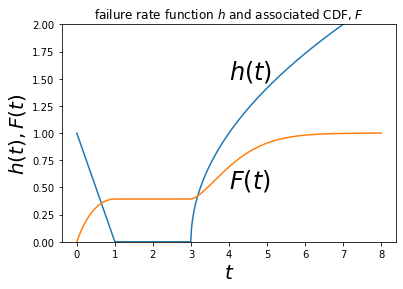

In [10]:
# Calculation of CDF from its failure rate function, using dF/dt=(1-F(t))h(t)
from scipy.integrate import odeint

def h(t):   # h is the failure rate function with a bathtub shape
    if t<1:
        return 1-t
    elif t<3:
        return 0.0
    else:
        return np.sqrt(t-3)
    

def Fdot(y,t):    
    return (1-y)*h(t)

t_max=8.0  #  Select so that F(t_max) is very close to one
time=np.linspace(0.0,t_max,1000)
Finit=0.0
F=odeint(Fdot,Finit,time)
print(np.shape(F))
plt.plot(time,list(map(h,time)))
plt.text(4,h(4)+0.5, r'$h(t)$',fontsize=24) #Plots labels in the graph
plt.text(4,0.5, r'$F(t)$',fontsize=24) 

plt.plot(time,F)
plt.title('failure rate function $h$ and associated CDF, $F$')
plt.axis(ymin=0,ymax=2.0)
plt.ylabel('$h(t), F(t)$',fontsize=20)
plt.xlabel('$t$',fontsize=20)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the information on failure rate functions and the example above, do the following:
<ol>
<li> Write code that, given the failure rate function of a random variable $T$, computes the mean lifetime, $E[T].$  Use this code to determine the mean lifetime for the example given above.  (Hint: An easy way to do this problem is to use the area rule for expectations. Since $T$ is nonnegative, the area rule for expectations gives $E[T]=\int_0^\infty(1-F(t)) dt.$
The integral $\int_0^\infty (1-F(t)) dt$ is approximately equal to
$\int_0^{t_{max}} (1-F(t)) dt,$  which, by the definition of Riemann integration, is approximately equal to
$h \sum_{i=1}^{1000} (1-F(h_i)) $ where $h=t_{max}/1000.$  Basically the code above returns the samples $F(h_i)$ so all you need to do is subtract these values from 1, sum them up and multiply by $h$.)
<li> What happens to $E[T]$ if the failure rate function is doubled for all time? Print out the new value of $E[T]$.
</ol>

In [4]:
# Your code here
#problem 1
delta_h=t_max/1000

Sum=0
for [hi] in F:
    Sum+=delta_h*(1-hi)
print('mean is:',Sum)

mean is: 2.656524220052051


In [13]:
#problem 2
def h2(t):   # h is the failure rate function with a bathtub shape
    if t<1:
        return 2*(1-t)
    elif t<3:
        return 0.0
    else:
        return 2*np.sqrt(t-3)
def Fdot2(y,t):    
    return (1-y)*h2(t)

t_max=8.0  #  Select so that F(t_max) is very close to one
time=np.linspace(0.0,t_max,1000)
Finit=0.0
F2=odeint(Fdot2,Finit,time)
delta_h=t_max/1000
Sum2=0
#print(np.shape(F2))
#print(F2)
for [hi] in F2:
    Sum2+=delta_h*(1-hi)
print('mean is:',Sum2)

mean is: 1.5504448592454616


problem 2 <br>
as we see, E[T] decrease as failure rate double

__Answer:__ (Your answer here)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>** 

## Evolutionary games (replicator dynamics):

Consider a population of individuals, where each individual is of some type.  Suppose individuals have occasional pairwise encounters.  During an encounter the two individuals involved play a two player symmetric game in which the strategies are the types of the individuals.   As a result of the encounter, each of the two individuals produces a number of offspring of its same type, with the number being determined by a fitess table or, equivalently, a fitness matrix.   For example, consider a population of crickets such that each cricket is either small or large.   If two small crickets meet each other then they each spawn five more small crickets.  If a small cricket encounters a large cricket then the small cricket spawns one more small cricket and the large cricket spawns eight new large crickets.   If two large crickets meet then each of them spawns three new large crickets.  We can summarize these outcomes using the following table:
$$\begin{array}{c|cc}  & small & large  \\ \hline
    small & 5 & 1  \\
    large & 8 & 3
    \end{array}$$
or by a fitness matrix
$$F=\left( \begin{array}{cc}  5 & 1 \\ 8 & 3  \end{array}\right).$$ 
Associating 0 with "small" and 1 with "large,"  we see that if a type i individual encounters a type j individual, then the type i individual spawns F[i,j] new individuals of type i, and the type j individual spawns F[j,i] new individuals of type j. Below is a stochastic simulation for this game where we start with a population of four small crickets and four large crickets. It may be a useful exercise for you to think of how the values for $a$ and $b$ were created.


In [14]:
# Stochastic simulation of replicator dynamics for cricket game

F=np.array([[5,1],[8,3]])  # fitness matrix

n=np.array([4,4])  #[number of small crickets, number of large crickets], initialized
print ("                                   State      Fractions of each type")
print ("Initially                        ", n, "      ", n/1./np.sum(n))

T = 8000 #total number of encounters

for k in range(T):   # k tracks number of encounters
    a=n[0]*(n[0]-1.0)/((n[0]+n[1])*(n[0]+n[1]-1))  # probability both players are type 0
    b=2*n[0]*n[1]/((n[0]+n[1])*(n[0]+n[1]-1.0))  # probability one player of each type
    U=np.random.rand()
    if U<=a:
        n+=[2*F[0,0],0]
        print ("Round",k+1,"two small crickets meet ", n, n/1./np.sum(n))
    elif a<U<=a+b:
        n+=[F[0,1],F[1,0]]
        print ("Round",k+1,"a small meets a large   ", n, n/1./np.sum(n))
    else:
        n+=[0,2*F[1,1]]
        print ("Round",k+1,"two large crickets meet ", n, n/1./np.sum(n))


[4 4]
                                   State      Fractions of each type
Initially                         [4 4]        [0.5 0.5]
Round 1 a small meets a large    [ 5 12] [0.29411765 0.70588235]
Round 2 a small meets a large    [ 6 20] [0.23076923 0.76923077]
Round 3 two large crickets meet  [ 6 26] [0.1875 0.8125]
Round 4 a small meets a large    [ 7 34] [0.17073171 0.82926829]
Round 5 a small meets a large    [ 8 42] [0.16 0.84]
Round 6 two large crickets meet  [ 8 48] [0.14285714 0.85714286]
Round 7 two large crickets meet  [ 8 54] [0.12903226 0.87096774]
Round 8 two large crickets meet  [ 8 60] [0.11764706 0.88235294]
Round 9 two large crickets meet  [ 8 66] [0.10810811 0.89189189]
Round 10 two large crickets meet  [ 8 72] [0.1 0.9]
Round 11 a small meets a large    [ 9 80] [0.1011236 0.8988764]
Round 12 two large crickets meet  [ 9 86] [0.09473684 0.90526316]
Round 13 two large crickets meet  [ 9 92] [0.08910891 0.91089109]
Round 14 a small meets a large    [ 10 100] [0.09090909

Round 257 two large crickets meet  [  18 1574] [0.01130653 0.98869347]
Round 258 two large crickets meet  [  18 1580] [0.01126408 0.98873592]
Round 259 two large crickets meet  [  18 1586] [0.01122195 0.98877805]
Round 260 two large crickets meet  [  18 1592] [0.01118012 0.98881988]
Round 261 two large crickets meet  [  18 1598] [0.01113861 0.98886139]
Round 262 two large crickets meet  [  18 1604] [0.01109741 0.98890259]
Round 263 two large crickets meet  [  18 1610] [0.01105651 0.98894349]
Round 264 two large crickets meet  [  18 1616] [0.01101591 0.98898409]
Round 265 two large crickets meet  [  18 1622] [0.01097561 0.98902439]
Round 266 two large crickets meet  [  18 1628] [0.0109356 0.9890644]
Round 267 two large crickets meet  [  18 1634] [0.01089588 0.98910412]
Round 268 two large crickets meet  [  18 1640] [0.01085645 0.98914355]
Round 269 two large crickets meet  [  18 1646] [0.01081731 0.98918269]
Round 270 two large crickets meet  [  18 1652] [0.01077844 0.98922156]
Round 27

Round 504 two large crickets meet  [  21 3062] [0.00681155 0.99318845]
Round 505 two large crickets meet  [  21 3068] [0.00679832 0.99320168]
Round 506 two large crickets meet  [  21 3074] [0.00678514 0.99321486]
Round 507 two large crickets meet  [  21 3080] [0.00677201 0.99322799]
Round 508 two large crickets meet  [  21 3086] [0.00675893 0.99324107]
Round 509 two large crickets meet  [  21 3092] [0.0067459 0.9932541]
Round 510 two large crickets meet  [  21 3098] [0.00673293 0.99326707]
Round 511 two large crickets meet  [  21 3104] [0.00672 0.99328]
Round 512 two large crickets meet  [  21 3110] [0.00670712 0.99329288]
Round 513 two large crickets meet  [  21 3116] [0.00669429 0.99330571]
Round 514 two large crickets meet  [  21 3122] [0.00668151 0.99331849]
Round 515 two large crickets meet  [  21 3128] [0.00666878 0.99333122]
Round 516 two large crickets meet  [  21 3134] [0.0066561 0.9933439]
Round 517 two large crickets meet  [  21 3140] [0.00664347 0.99335653]
Round 518 two la

Round 776 two large crickets meet  [  23 4698] [0.00487185 0.99512815]
Round 777 two large crickets meet  [  23 4704] [0.00486567 0.99513433]
Round 778 two large crickets meet  [  23 4710] [0.0048595 0.9951405]
Round 779 two large crickets meet  [  23 4716] [0.00485334 0.99514666]
Round 780 two large crickets meet  [  23 4722] [0.00484721 0.99515279]
Round 781 two large crickets meet  [  23 4728] [0.00484109 0.99515891]
Round 782 two large crickets meet  [  23 4734] [0.00483498 0.99516502]
Round 783 two large crickets meet  [  23 4740] [0.00482889 0.99517111]
Round 784 two large crickets meet  [  23 4746] [0.00482281 0.99517719]
Round 785 two large crickets meet  [  23 4752] [0.00481675 0.99518325]
Round 786 two large crickets meet  [  23 4758] [0.00481071 0.99518929]
Round 787 two large crickets meet  [  23 4764] [0.00480468 0.99519532]
Round 788 two large crickets meet  [  23 4770] [0.00479866 0.99520134]
Round 789 two large crickets meet  [  23 4776] [0.00479267 0.99520733]
Round 79

Round 1066 two large crickets meet  [  26 6444] [0.00401855 0.99598145]
Round 1067 two large crickets meet  [  26 6450] [0.00401482 0.99598518]
Round 1068 two large crickets meet  [  26 6456] [0.00401111 0.99598889]
Round 1069 two large crickets meet  [  26 6462] [0.0040074 0.9959926]
Round 1070 two large crickets meet  [  26 6468] [0.0040037 0.9959963]
Round 1071 two large crickets meet  [  26 6474] [0.004 0.996]
Round 1072 two large crickets meet  [  26 6480] [0.00399631 0.99600369]
Round 1073 two large crickets meet  [  26 6486] [0.00399263 0.99600737]
Round 1074 two large crickets meet  [  26 6492] [0.00398895 0.99601105]
Round 1075 two large crickets meet  [  26 6498] [0.00398529 0.99601471]
Round 1076 two large crickets meet  [  26 6504] [0.00398162 0.99601838]
Round 1077 two large crickets meet  [  26 6510] [0.00397797 0.99602203]
Round 1078 two large crickets meet  [  26 6516] [0.00397432 0.99602568]
Round 1079 two large crickets meet  [  26 6522] [0.00397068 0.99602932]
Round 

Round 1324 two large crickets meet  [  31 8002] [0.00385908 0.99614092]
Round 1325 two large crickets meet  [  31 8008] [0.0038562 0.9961438]
Round 1326 two large crickets meet  [  31 8014] [0.00385333 0.99614667]
Round 1327 two large crickets meet  [  31 8020] [0.00385045 0.99614955]
Round 1328 two large crickets meet  [  31 8026] [0.00384759 0.99615241]
Round 1329 two large crickets meet  [  31 8032] [0.00384472 0.99615528]
Round 1330 two large crickets meet  [  31 8038] [0.00384186 0.99615814]
Round 1331 two large crickets meet  [  31 8044] [0.00383901 0.99616099]
Round 1332 two large crickets meet  [  31 8050] [0.00383616 0.99616384]
Round 1333 two large crickets meet  [  31 8056] [0.00383331 0.99616669]
Round 1334 two large crickets meet  [  31 8062] [0.00383047 0.99616953]
Round 1335 two large crickets meet  [  31 8068] [0.00382763 0.99617237]
Round 1336 two large crickets meet  [  31 8074] [0.0038248 0.9961752]
Round 1337 two large crickets meet  [  31 8080] [0.00382197 0.996178

Round 1618 two large crickets meet  [  34 9772] [0.00346726 0.99653274]
Round 1619 two large crickets meet  [  34 9778] [0.00346514 0.99653486]
Round 1620 two large crickets meet  [  34 9784] [0.00346303 0.99653697]
Round 1621 two large crickets meet  [  34 9790] [0.00346091 0.99653909]
Round 1622 two large crickets meet  [  34 9796] [0.0034588 0.9965412]
Round 1623 two large crickets meet  [  34 9802] [0.00345669 0.99654331]
Round 1624 two large crickets meet  [  34 9808] [0.00345458 0.99654542]
Round 1625 two large crickets meet  [  34 9814] [0.00345248 0.99654752]
Round 1626 two large crickets meet  [  34 9820] [0.00345038 0.99654962]
Round 1627 two large crickets meet  [  34 9826] [0.00344828 0.99655172]
Round 1628 two large crickets meet  [  34 9832] [0.00344618 0.99655382]
Round 1629 two large crickets meet  [  34 9838] [0.00344408 0.99655592]
Round 1630 two large crickets meet  [  34 9844] [0.00344199 0.99655801]
Round 1631 two large crickets meet  [  34 9850] [0.0034399 0.99656

Round 1895 two large crickets meet  [   36 11438] [0.00313753 0.99686247]
Round 1896 two large crickets meet  [   36 11444] [0.00313589 0.99686411]
Round 1897 two large crickets meet  [   36 11450] [0.00313425 0.99686575]
Round 1898 two large crickets meet  [   36 11456] [0.00313261 0.99686739]
Round 1899 two large crickets meet  [   36 11462] [0.00313098 0.99686902]
Round 1900 two large crickets meet  [   36 11468] [0.00312935 0.99687065]
Round 1901 two large crickets meet  [   36 11474] [0.00312772 0.99687228]
Round 1902 two large crickets meet  [   36 11480] [0.00312609 0.99687391]
Round 1903 two large crickets meet  [   36 11486] [0.00312446 0.99687554]
Round 1904 two large crickets meet  [   36 11492] [0.00312283 0.99687717]
Round 1905 two large crickets meet  [   36 11498] [0.00312121 0.99687879]
Round 1906 two large crickets meet  [   36 11504] [0.00311958 0.99688042]
Round 1907 two large crickets meet  [   36 11510] [0.00311796 0.99688204]
Round 1908 two large crickets meet  [ 

Round 2224 two large crickets meet  [   40 13420] [0.00297177 0.99702823]
Round 2225 two large crickets meet  [   40 13426] [0.00297044 0.99702956]
Round 2226 two large crickets meet  [   40 13432] [0.00296912 0.99703088]
Round 2227 two large crickets meet  [   40 13438] [0.0029678 0.9970322]
Round 2228 two large crickets meet  [   40 13444] [0.00296648 0.99703352]
Round 2229 two large crickets meet  [   40 13450] [0.00296516 0.99703484]
Round 2230 two large crickets meet  [   40 13456] [0.00296384 0.99703616]
Round 2231 two large crickets meet  [   40 13462] [0.00296252 0.99703748]
Round 2232 two large crickets meet  [   40 13468] [0.00296121 0.99703879]
Round 2233 two large crickets meet  [   40 13474] [0.00295989 0.99704011]
Round 2234 two large crickets meet  [   40 13480] [0.00295858 0.99704142]
Round 2235 two large crickets meet  [   40 13486] [0.00295727 0.99704273]
Round 2236 two large crickets meet  [   40 13492] [0.00295596 0.99704404]
Round 2237 two large crickets meet  [   

Round 2523 two large crickets meet  [   42 15218] [0.00275229 0.99724771]
Round 2524 two large crickets meet  [   42 15224] [0.00275121 0.99724879]
Round 2525 two large crickets meet  [   42 15230] [0.00275013 0.99724987]
Round 2526 two large crickets meet  [   42 15236] [0.00274905 0.99725095]
Round 2527 two large crickets meet  [   42 15242] [0.00274797 0.99725203]
Round 2528 two large crickets meet  [   42 15248] [0.00274689 0.99725311]
Round 2529 two large crickets meet  [   42 15254] [0.00274582 0.99725418]
Round 2530 two large crickets meet  [   42 15260] [0.00274474 0.99725526]
Round 2531 two large crickets meet  [   42 15266] [0.00274366 0.99725634]
Round 2532 two large crickets meet  [   42 15272] [0.00274259 0.99725741]
Round 2533 two large crickets meet  [   42 15278] [0.00274151 0.99725849]
Round 2534 two large crickets meet  [   42 15284] [0.00274044 0.99725956]
Round 2535 two large crickets meet  [   42 15290] [0.00273937 0.99726063]
Round 2536 two large crickets meet  [ 

Round 2784 two large crickets meet  [   43 16786] [0.00255511 0.99744489]
Round 2785 two large crickets meet  [   43 16792] [0.0025542 0.9974458]
Round 2786 two large crickets meet  [   43 16798] [0.00255329 0.99744671]
Round 2787 two large crickets meet  [   43 16804] [0.00255238 0.99744762]
Round 2788 two large crickets meet  [   43 16810] [0.00255147 0.99744853]
Round 2789 two large crickets meet  [   43 16816] [0.00255057 0.99744943]
Round 2790 two large crickets meet  [   43 16822] [0.00254966 0.99745034]
Round 2791 two large crickets meet  [   43 16828] [0.00254875 0.99745125]
Round 2792 two large crickets meet  [   43 16834] [0.00254785 0.99745215]
Round 2793 two large crickets meet  [   43 16840] [0.00254694 0.99745306]
Round 2794 two large crickets meet  [   43 16846] [0.00254604 0.99745396]
Round 2795 two large crickets meet  [   43 16852] [0.00254513 0.99745487]
Round 2796 two large crickets meet  [   43 16858] [0.00254423 0.99745577]
Round 2797 two large crickets meet  [   

Round 3056 two large crickets meet  [   44 18420] [0.00238302 0.99761698]
Round 3057 two large crickets meet  [   44 18426] [0.00238224 0.99761776]
Round 3058 two large crickets meet  [   44 18432] [0.00238147 0.99761853]
Round 3059 two large crickets meet  [   44 18438] [0.00238069 0.99761931]
Round 3060 two large crickets meet  [   44 18444] [0.00237992 0.99762008]
Round 3061 two large crickets meet  [   44 18450] [0.00237915 0.99762085]
Round 3062 two large crickets meet  [   44 18456] [0.00237838 0.99762162]
Round 3063 two large crickets meet  [   44 18462] [0.00237761 0.99762239]
Round 3064 two large crickets meet  [   44 18468] [0.00237684 0.99762316]
Round 3065 two large crickets meet  [   44 18474] [0.00237607 0.99762393]
Round 3066 two large crickets meet  [   44 18480] [0.0023753 0.9976247]
Round 3067 two large crickets meet  [   44 18486] [0.00237453 0.99762547]
Round 3068 two large crickets meet  [   44 18492] [0.00237376 0.99762624]
Round 3069 two large crickets meet  [   

Round 3303 two large crickets meet  [   45 19904] [0.00225575 0.99774425]
Round 3304 two large crickets meet  [   45 19910] [0.00225507 0.99774493]
Round 3305 two large crickets meet  [   45 19916] [0.0022544 0.9977456]
Round 3306 two large crickets meet  [   45 19922] [0.00225372 0.99774628]
Round 3307 two large crickets meet  [   45 19928] [0.00225304 0.99774696]
Round 3308 two large crickets meet  [   45 19934] [0.00225236 0.99774764]
Round 3309 two large crickets meet  [   45 19940] [0.00225169 0.99774831]
Round 3310 two large crickets meet  [   45 19946] [0.00225101 0.99774899]
Round 3311 two large crickets meet  [   45 19952] [0.00225034 0.99774966]
Round 3312 two large crickets meet  [   45 19958] [0.00224966 0.99775034]
Round 3313 two large crickets meet  [   45 19964] [0.00224899 0.99775101]
Round 3314 two large crickets meet  [   45 19970] [0.00224831 0.99775169]
Round 3315 two large crickets meet  [   45 19976] [0.00224764 0.99775236]
Round 3316 two large crickets meet  [   

Round 3623 two large crickets meet  [   46 21826] [0.00210315 0.99789685]
Round 3624 two large crickets meet  [   46 21832] [0.00210257 0.99789743]
Round 3625 two large crickets meet  [   46 21838] [0.00210199 0.99789801]
Round 3626 two large crickets meet  [   46 21844] [0.00210142 0.99789858]
Round 3627 two large crickets meet  [   46 21850] [0.00210084 0.99789916]
Round 3628 two large crickets meet  [   46 21856] [0.00210026 0.99789974]
Round 3629 two large crickets meet  [   46 21862] [0.00209969 0.99790031]
Round 3630 two large crickets meet  [   46 21868] [0.00209911 0.99790089]
Round 3631 two large crickets meet  [   46 21874] [0.00209854 0.99790146]
Round 3632 two large crickets meet  [   46 21880] [0.00209797 0.99790203]
Round 3633 two large crickets meet  [   46 21886] [0.00209739 0.99790261]
Round 3634 two large crickets meet  [   46 21892] [0.00209682 0.99790318]
Round 3635 two large crickets meet  [   46 21898] [0.00209624 0.99790376]
Round 3636 two large crickets meet  [ 

Round 3869 two large crickets meet  [   47 23304] [0.00201276 0.99798724]
Round 3870 two large crickets meet  [   47 23310] [0.00201224 0.99798776]
Round 3871 two large crickets meet  [   47 23316] [0.00201173 0.99798827]
Round 3872 two large crickets meet  [   47 23322] [0.00201121 0.99798879]
Round 3873 two large crickets meet  [   47 23328] [0.0020107 0.9979893]
Round 3874 two large crickets meet  [   47 23334] [0.00201018 0.99798982]
Round 3875 two large crickets meet  [   47 23340] [0.00200966 0.99799034]
Round 3876 two large crickets meet  [   47 23346] [0.00200915 0.99799085]
Round 3877 two large crickets meet  [   47 23352] [0.00200863 0.99799137]
Round 3878 two large crickets meet  [   47 23358] [0.00200812 0.99799188]
Round 3879 two large crickets meet  [   47 23364] [0.0020076 0.9979924]
Round 3880 two large crickets meet  [   47 23370] [0.00200709 0.99799291]
Round 3881 two large crickets meet  [   47 23376] [0.00200657 0.99799343]
Round 3882 two large crickets meet  [   47

Round 4140 two large crickets meet  [   48 24932] [0.00192154 0.99807846]
Round 4141 two large crickets meet  [   48 24938] [0.00192108 0.99807892]
Round 4142 two large crickets meet  [   48 24944] [0.00192061 0.99807939]
Round 4143 two large crickets meet  [   48 24950] [0.00192015 0.99807985]
Round 4144 two large crickets meet  [   48 24956] [0.00191969 0.99808031]
Round 4145 two large crickets meet  [   48 24962] [0.00191923 0.99808077]
Round 4146 two large crickets meet  [   48 24968] [0.00191877 0.99808123]
Round 4147 two large crickets meet  [   48 24974] [0.00191831 0.99808169]
Round 4148 two large crickets meet  [   48 24980] [0.00191785 0.99808215]
Round 4149 two large crickets meet  [   48 24986] [0.00191739 0.99808261]
Round 4150 two large crickets meet  [   48 24992] [0.00191693 0.99808307]
Round 4151 two large crickets meet  [   48 24998] [0.00191647 0.99808353]
Round 4152 two large crickets meet  [   48 25004] [0.00191601 0.99808399]
Round 4153 two large crickets meet  [ 

Round 4388 two large crickets meet  [   48 26420] [0.00181351 0.99818649]
Round 4389 two large crickets meet  [   48 26426] [0.0018131 0.9981869]
Round 4390 two large crickets meet  [   48 26432] [0.00181269 0.99818731]
Round 4391 two large crickets meet  [   48 26438] [0.00181228 0.99818772]
Round 4392 two large crickets meet  [   48 26444] [0.00181187 0.99818813]
Round 4393 two large crickets meet  [   48 26450] [0.00181146 0.99818854]
Round 4394 two large crickets meet  [   48 26456] [0.00181105 0.99818895]
Round 4395 two large crickets meet  [   48 26462] [0.00181064 0.99818936]
Round 4396 two large crickets meet  [   48 26468] [0.00181023 0.99818977]
Round 4397 two large crickets meet  [   48 26474] [0.00180982 0.99819018]
Round 4398 two large crickets meet  [   48 26480] [0.00180941 0.99819059]
Round 4399 two large crickets meet  [   48 26486] [0.001809 0.998191]
Round 4400 two large crickets meet  [   48 26492] [0.00180859 0.99819141]
Round 4401 two large crickets meet  [   48 2

Round 4640 two large crickets meet  [   49 27934] [0.00175106 0.99824894]
Round 4641 two large crickets meet  [   49 27940] [0.00175069 0.99824931]
Round 4642 two large crickets meet  [   49 27946] [0.00175031 0.99824969]
Round 4643 two large crickets meet  [   49 27952] [0.00174994 0.99825006]
Round 4644 two large crickets meet  [   49 27958] [0.00174956 0.99825044]
Round 4645 two large crickets meet  [   49 27964] [0.00174919 0.99825081]
Round 4646 two large crickets meet  [   49 27970] [0.00174881 0.99825119]
Round 4647 two large crickets meet  [   49 27976] [0.00174844 0.99825156]
Round 4648 two large crickets meet  [   49 27982] [0.00174806 0.99825194]
Round 4649 two large crickets meet  [   49 27988] [0.00174769 0.99825231]
Round 4650 two large crickets meet  [   49 27994] [0.00174732 0.99825268]
Round 4651 two large crickets meet  [   49 28000] [0.00174694 0.99825306]
Round 4652 two large crickets meet  [   49 28006] [0.00174657 0.99825343]
Round 4653 two large crickets meet  [ 

Round 4899 two large crickets meet  [   50 29490] [0.00169262 0.99830738]
Round 4900 two large crickets meet  [   50 29496] [0.00169228 0.99830772]
Round 4901 two large crickets meet  [   50 29502] [0.00169193 0.99830807]
Round 4902 two large crickets meet  [   50 29508] [0.00169159 0.99830841]
Round 4903 two large crickets meet  [   50 29514] [0.00169125 0.99830875]
Round 4904 two large crickets meet  [   50 29520] [0.0016909 0.9983091]
Round 4905 two large crickets meet  [   50 29526] [0.00169056 0.99830944]
Round 4906 two large crickets meet  [   50 29532] [0.00169022 0.99830978]
Round 4907 two large crickets meet  [   50 29538] [0.00168987 0.99831013]
Round 4908 two large crickets meet  [   50 29544] [0.00168953 0.99831047]
Round 4909 two large crickets meet  [   50 29550] [0.00168919 0.99831081]
Round 4910 two large crickets meet  [   50 29556] [0.00168885 0.99831115]
Round 4911 two large crickets meet  [   50 29562] [0.0016885 0.9983115]
Round 4912 two large crickets meet  [   50

Round 5186 two large crickets meet  [   50 31212] [0.00159939 0.99840061]
Round 5187 two large crickets meet  [   50 31218] [0.00159908 0.99840092]
Round 5188 two large crickets meet  [   50 31224] [0.00159877 0.99840123]
Round 5189 two large crickets meet  [   50 31230] [0.00159847 0.99840153]
Round 5190 two large crickets meet  [   50 31236] [0.00159816 0.99840184]
Round 5191 two large crickets meet  [   50 31242] [0.00159785 0.99840215]
Round 5192 two large crickets meet  [   50 31248] [0.00159755 0.99840245]
Round 5193 two large crickets meet  [   50 31254] [0.00159724 0.99840276]
Round 5194 two large crickets meet  [   50 31260] [0.00159693 0.99840307]
Round 5195 two large crickets meet  [   50 31266] [0.00159663 0.99840337]
Round 5196 two large crickets meet  [   50 31272] [0.00159632 0.99840368]
Round 5197 two large crickets meet  [   50 31278] [0.00159602 0.99840398]
Round 5198 two large crickets meet  [   50 31284] [0.00159571 0.99840429]
Round 5199 two large crickets meet  [ 

Round 5476 two large crickets meet  [   51 32954] [0.00154522 0.99845478]
Round 5477 two large crickets meet  [   51 32960] [0.00154494 0.99845506]
Round 5478 two large crickets meet  [   51 32966] [0.00154466 0.99845534]
Round 5479 two large crickets meet  [   51 32972] [0.00154438 0.99845562]
Round 5480 two large crickets meet  [   51 32978] [0.0015441 0.9984559]
Round 5481 two large crickets meet  [   51 32984] [0.00154382 0.99845618]
Round 5482 two large crickets meet  [   51 32990] [0.00154354 0.99845646]
Round 5483 two large crickets meet  [   51 32996] [0.00154326 0.99845674]
Round 5484 two large crickets meet  [   51 33002] [0.00154298 0.99845702]
Round 5485 two large crickets meet  [   51 33008] [0.0015427 0.9984573]
Round 5486 two large crickets meet  [   51 33014] [0.00154242 0.99845758]
Round 5487 two large crickets meet  [   51 33020] [0.00154214 0.99845786]
Round 5488 two large crickets meet  [   51 33026] [0.00154186 0.99845814]
Round 5489 two large crickets meet  [   51

Round 5736 two large crickets meet  [   51 34514] [0.00147548 0.99852452]
Round 5737 two large crickets meet  [   51 34520] [0.00147522 0.99852478]
Round 5738 two large crickets meet  [   51 34526] [0.00147497 0.99852503]
Round 5739 two large crickets meet  [   51 34532] [0.00147471 0.99852529]
Round 5740 two large crickets meet  [   51 34538] [0.00147446 0.99852554]
Round 5741 two large crickets meet  [   51 34544] [0.0014742 0.9985258]
Round 5742 two large crickets meet  [   51 34550] [0.00147395 0.99852605]
Round 5743 two large crickets meet  [   51 34556] [0.00147369 0.99852631]
Round 5744 two large crickets meet  [   51 34562] [0.00147343 0.99852657]
Round 5745 two large crickets meet  [   51 34568] [0.00147318 0.99852682]
Round 5746 two large crickets meet  [   51 34574] [0.00147292 0.99852708]
Round 5747 two large crickets meet  [   51 34580] [0.00147267 0.99852733]
Round 5748 two large crickets meet  [   51 34586] [0.00147241 0.99852759]
Round 5749 two large crickets meet  [   

Round 6042 two large crickets meet  [   52 36352] [0.00142841 0.99857159]
Round 6043 two large crickets meet  [   52 36358] [0.00142818 0.99857182]
Round 6044 two large crickets meet  [   52 36364] [0.00142794 0.99857206]
Round 6045 two large crickets meet  [   52 36370] [0.00142771 0.99857229]
Round 6046 two large crickets meet  [   52 36376] [0.00142747 0.99857253]
Round 6047 two large crickets meet  [   52 36382] [0.00142724 0.99857276]
Round 6048 two large crickets meet  [   52 36388] [0.001427 0.998573]
Round 6049 two large crickets meet  [   52 36394] [0.00142677 0.99857323]
Round 6050 two large crickets meet  [   52 36400] [0.00142653 0.99857347]
Round 6051 two large crickets meet  [   52 36406] [0.0014263 0.9985737]
Round 6052 two large crickets meet  [   52 36412] [0.00142606 0.99857394]
Round 6053 two large crickets meet  [   52 36418] [0.00142583 0.99857417]
Round 6054 two large crickets meet  [   52 36424] [0.00142559 0.99857441]
Round 6055 two large crickets meet  [   52 3

Round 6301 two large crickets meet  [   53 37908] [0.00139617 0.99860383]
Round 6302 two large crickets meet  [   53 37914] [0.00139595 0.99860405]
Round 6303 two large crickets meet  [   53 37920] [0.00139573 0.99860427]
Round 6304 two large crickets meet  [   53 37926] [0.00139551 0.99860449]
Round 6305 two large crickets meet  [   53 37932] [0.00139529 0.99860471]
Round 6306 two large crickets meet  [   53 37938] [0.00139507 0.99860493]
Round 6307 two large crickets meet  [   53 37944] [0.00139485 0.99860515]
Round 6308 two large crickets meet  [   53 37950] [0.00139463 0.99860537]
Round 6309 two large crickets meet  [   53 37956] [0.00139441 0.99860559]
Round 6310 two large crickets meet  [   53 37962] [0.00139419 0.99860581]
Round 6311 two large crickets meet  [   53 37968] [0.00139397 0.99860603]
Round 6312 two large crickets meet  [   53 37974] [0.00139375 0.99860625]
Round 6313 two large crickets meet  [   53 37980] [0.00139353 0.99860647]
Round 6314 two large crickets meet  [ 

Round 6585 two large crickets meet  [   53 39612] [0.00133619 0.99866381]
Round 6586 two large crickets meet  [   53 39618] [0.00133599 0.99866401]
Round 6587 two large crickets meet  [   53 39624] [0.00133579 0.99866421]
Round 6588 two large crickets meet  [   53 39630] [0.00133558 0.99866442]
Round 6589 two large crickets meet  [   53 39636] [0.00133538 0.99866462]
Round 6590 two large crickets meet  [   53 39642] [0.00133518 0.99866482]
Round 6591 two large crickets meet  [   53 39648] [0.00133498 0.99866502]
Round 6592 two large crickets meet  [   53 39654] [0.00133478 0.99866522]
Round 6593 two large crickets meet  [   53 39660] [0.00133458 0.99866542]
Round 6594 two large crickets meet  [   53 39666] [0.00133437 0.99866563]
Round 6595 two large crickets meet  [   53 39672] [0.00133417 0.99866583]
Round 6596 two large crickets meet  [   53 39678] [0.00133397 0.99866603]
Round 6597 two large crickets meet  [   53 39684] [0.00133377 0.99866623]
Round 6598 two large crickets meet  [ 

Round 6856 two large crickets meet  [   54 41240] [0.0013077 0.9986923]
Round 6857 two large crickets meet  [   54 41246] [0.00130751 0.99869249]
Round 6858 two large crickets meet  [   54 41252] [0.00130732 0.99869268]
Round 6859 two large crickets meet  [   54 41258] [0.00130713 0.99869287]
Round 6860 two large crickets meet  [   54 41264] [0.00130694 0.99869306]
Round 6861 two large crickets meet  [   54 41270] [0.00130675 0.99869325]
Round 6862 two large crickets meet  [   54 41276] [0.00130656 0.99869344]
Round 6863 two large crickets meet  [   54 41282] [0.00130637 0.99869363]
Round 6864 two large crickets meet  [   54 41288] [0.00130618 0.99869382]
Round 6865 two large crickets meet  [   54 41294] [0.00130599 0.99869401]
Round 6866 two large crickets meet  [   54 41300] [0.0013058 0.9986942]
Round 6867 two large crickets meet  [   54 41306] [0.00130561 0.99869439]
Round 6868 two large crickets meet  [   54 41312] [0.00130542 0.99869458]
Round 6869 two large crickets meet  [   54

Round 7133 two large crickets meet  [   54 42902] [0.0012571 0.9987429]
Round 7134 two large crickets meet  [   54 42908] [0.00125692 0.99874308]
Round 7135 two large crickets meet  [   54 42914] [0.00125675 0.99874325]
Round 7136 two large crickets meet  [   54 42920] [0.00125657 0.99874343]
Round 7137 two large crickets meet  [   54 42926] [0.0012564 0.9987436]
Round 7138 two large crickets meet  [   54 42932] [0.00125622 0.99874378]
Round 7139 two large crickets meet  [   54 42938] [0.00125605 0.99874395]
Round 7140 two large crickets meet  [   54 42944] [0.00125587 0.99874413]
Round 7141 two large crickets meet  [   54 42950] [0.0012557 0.9987443]
Round 7142 two large crickets meet  [   54 42956] [0.00125552 0.99874448]
Round 7143 two large crickets meet  [   54 42962] [0.00125535 0.99874465]
Round 7144 two large crickets meet  [   54 42968] [0.00125517 0.99874483]
Round 7145 two large crickets meet  [   54 42974] [0.001255 0.998745]
Round 7146 two large crickets meet  [   54 42980

Round 7425 two large crickets meet  [   54 44654] [0.00120784 0.99879216]
Round 7426 two large crickets meet  [   54 44660] [0.00120768 0.99879232]
Round 7427 two large crickets meet  [   54 44666] [0.00120751 0.99879249]
Round 7428 two large crickets meet  [   54 44672] [0.00120735 0.99879265]
Round 7429 two large crickets meet  [   54 44678] [0.00120719 0.99879281]
Round 7430 two large crickets meet  [   54 44684] [0.00120703 0.99879297]
Round 7431 two large crickets meet  [   54 44690] [0.00120687 0.99879313]
Round 7432 two large crickets meet  [   54 44696] [0.0012067 0.9987933]
Round 7433 two large crickets meet  [   54 44702] [0.00120654 0.99879346]
Round 7434 two large crickets meet  [   54 44708] [0.00120638 0.99879362]
Round 7435 two large crickets meet  [   54 44714] [0.00120622 0.99879378]
Round 7436 two large crickets meet  [   54 44720] [0.00120606 0.99879394]
Round 7437 two large crickets meet  [   54 44726] [0.0012059 0.9987941]
Round 7438 two large crickets meet  [   54

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in long_scalars
  del sys.path[0]


two large crickets meet  [   54 46322] [0.0011644 0.9988356]
Round 7704 two large crickets meet  [   54 46328] [0.00116424 0.99883576]
Round 7705 two large crickets meet  [   54 46334] [0.00116409 0.99883591]
Round 7706 two large crickets meet  [   54 46340] [0.00116394 0.99883606]
Round 7707 two large crickets meet  [   54 46346] [0.00116379 0.99883621]
Round 7708 two large crickets meet  [   54 46352] [0.00116364 0.99883636]
Round 7709 two large crickets meet  [   54 46358] [0.00116349 0.99883651]
Round 7710 two large crickets meet  [   54 46364] [0.00116334 0.99883666]
Round 7711 two large crickets meet  [   54 46370] [0.00116319 0.99883681]
Round 7712 two large crickets meet  [   54 46376] [0.00116304 0.99883696]
Round 7713 two large crickets meet  [   54 46382] [0.00116289 0.99883711]
Round 7714 two large crickets meet  [   54 46388] [0.00116274 0.99883726]
Round 7715 two large crickets meet  [   54 46394] [0.00116259 0.99883741]
Round 7716 two large crickets meet  [   54 46400] [

Round 7972 two large crickets meet  [   54 47936] [0.00112523 0.99887477]
Round 7973 two large crickets meet  [   54 47942] [0.00112509 0.99887491]
Round 7974 two large crickets meet  [   54 47948] [0.00112495 0.99887505]
Round 7975 two large crickets meet  [   54 47954] [0.00112481 0.99887519]
Round 7976 two large crickets meet  [   54 47960] [0.00112467 0.99887533]
Round 7977 two large crickets meet  [   54 47966] [0.00112453 0.99887547]
Round 7978 two large crickets meet  [   54 47972] [0.00112439 0.99887561]
Round 7979 two large crickets meet  [   54 47978] [0.00112425 0.99887575]
Round 7980 two large crickets meet  [   54 47984] [0.00112411 0.99887589]
Round 7981 two large crickets meet  [   54 47990] [0.00112397 0.99887603]
Round 7982 two large crickets meet  [   54 47996] [0.00112383 0.99887617]
Round 7983 two large crickets meet  [   54 48002] [0.00112369 0.99887631]
Round 7984 two large crickets meet  [   54 48008] [0.00112355 0.99887645]
Round 7985 two large crickets meet  [ 

The above simulation displays, after each encounter, the number of individuals of each type and the fraction of individuals of each type.   Run the simulation multiple times for different initial conditions.  
<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>**  Answer the following questions.   You do not need to provide code for this problem, but explain your answers.  
<ol>
<li> How quickly does the total population grow if initally all the crickets are small?  
<li> How quickly does the total population grow if initally all the crickets are large? 
<li> Do the fractions converge to a stable equilibrium in which the fractions of both small and large crickets are nonzero? (To explore convergence you may need to increase the number of encounters simulated.)
</ol>

__Answer:__ <br>
problem 1<br>
each round there would be 10 more small crickets<br>
problem 2<br>
each round there would be 6 more large crickets<br>
problem 3<br>
yes, it is converge<br>

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>** 

The code given next is essentially the same as above.  One difference is a time variable is added such that the average rate that an individual cricket has encounters is proportional to the total number of crickets.  This results in exponential growth of the population with time.    Another difference is that population sizes are saved and plotted.

[0.         0.18181818 0.28181818 0.34848485 0.39848485 0.43848485
 0.47419913 0.50496836 0.53199539 0.55580492 0.57731029 0.59672777
 0.61458491 0.63111384 0.64638101 0.66066673 0.67436536 0.68726858
 0.6994637  0.71122841 0.72240159 0.73303989 0.7431409  0.75275629
 0.7619306  0.77085917 0.77944286 0.78770732 0.79577184 0.80355394
 0.81107274 0.81842568 0.82561992 0.83266218 0.8394649  0.84606556
 0.85253805 0.85882736 0.8650002  0.8710062  0.87685416 0.88255216
 0.88809233 0.89348317 0.89874632 0.90388771 0.90891284 0.91386333
 0.91870595 0.92344528 0.92807491 0.93261006 0.9370545  0.9414118
 0.9456762  0.9498603  0.95395866 0.9579828  0.96195894 0.96588822
 0.96974922 0.97356602 0.97731836 0.9810016  0.98462479 0.98818985
 0.99169862 0.99517085 0.99860727 1.00199137 1.0053247  1.00860339
 1.01185014 1.01505014 1.01820472 1.02132972 1.02441138 1.02746482
 1.03049053 1.03348904 1.0364608  1.03940631 1.04231329 1.04518273
 1.04801559 1.05082458 1.0535985  1.05633823 1.05905562 1.06174

Text(0.5, 1.0, 'Numbers of small and large crickets vs. time (simulation)')

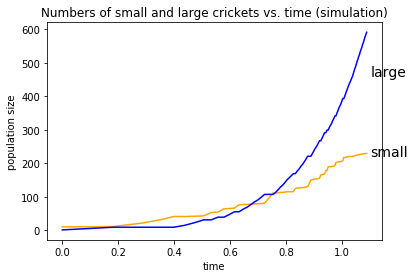

In [17]:
# Stochastic simulation of replicator dynamics for cricket game
# Time is scaled so contact rate of each individual is one per unit time
# The evolution trajectory is stored an plotted

F=np.array([[5,1],[8,3]])  # fitness matrix
n_max=100  # maximum number of interactions
n=np.zeros((n_max,2),dtype=float)
time=np.zeros(n_max,dtype=float)
#print(np.shape(n))
n[0,0], n[0,1] = 10,1 # initial [number of small crickets, number of large crickets]

for k in range(n_max-1):
    time[k+1]=time[k]+2.0/sum(n[k,:])   # The 2 is here because two individuals make contact at a time
    a=n[k,0]*(n[k,0]-1.0)/((n[k,0]+n[k,1])*(n[k,0]+n[k,1]-1))  # probability both players are type 0
    b=2*n[k,0]*n[k,1]/((n[k,0]+n[k,1])*(n[k,0]+n[k,1]-1.0))  # probability one player of each type
    U=np.random.rand()
    if U<=a:
        n[k+1,:]= n[k,:] + [2*F[0,0],0]
    elif a<U<=a+b:
        n[k+1,:]=n[k,:] + [F[0,1],F[1,0]]
    else:
        n[k+1,:]= n[k,:] + [0,2*F[1,1]]
print(time)
plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.text(1.1,n[80,0], r'small',fontsize=14)
plt.text(1.1,n[80,1], r'large',fontsize=14)
plt.xlabel('time')
plt.ylabel('population size')
plt.title("Numbers of small and large crickets vs. time (simulation)")


The following code computes the deterministic analog of the cricket evolution.  The basic idea is that if the current population is [n[0], n[1]] then the drift (i.e. the expected rate of increase) of n[0] is n[0]  multiplied by the expected number of small crickets generated by a small cricket if an encounter happens.  That is true because each of the existing small crikets is having encounters at expected rate one.   To calculate the mean number of new small crickets generated by the encounter of a small cricket with a randomly selected other cricket, we use the law of total probability.  The encountered cricket is type zero with probabiity n[0]/(n[0]+n[1]), which results in F[0,0] new crickets of type zero, and the encountered cricket is type one with probability n[1]/(n[0]+n[1]), which results in F[0,1] new crickets of type zero.   Combining we get
$$
\dot{n}[0] = n[0]*(F[0,0]*n[0]+F[0,1]*n[1])/(n[0]+n[1])
$$
The equation just derived is based on the law of large numbers (LLN).  If the population is fairly large then no one individual plays a major role in the evolution.  Over a small period of time the ratios of small and large crickets is nearly constant, so the number of new crickets of each type in each time slot are nearly independent and identically distributed.   The LLN suggests approximating the sum of number of individuals of each type by the expected numbers of individuals of each type.  That's how we arrive at a deterministic differential equation.

A similar expression holds for the derivative of n[1], and the two equations can be writen in matrix form as
$$
\dot{n} = diag(n)*F*n/sum(n)
$$
where diag(n) is the diagonal matrix with n[0] and n[1] on the diagonal, and "$*$" represents usual matrix multiplication.   (In the python code below, "$*$" denotes element by element multiplication, which is used instead of creating a diagonal matrix, and np.dot is used for ordinary matrix multiplication.)

[46.36363636  7.54545455]


Text(0.5, 1.0, 'Numbers of small and large crickets vs. time (ode prediction)')

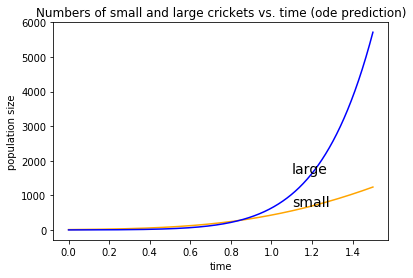

In [22]:
# Deterministic (ODE) replicator dynamics for cricket game
from scipy.integrate import odeint

F=np.array([[5,1],[8,3]])  # fitness matrix

def f(n,t):
    return (n*np.dot(F,n)/sum(n)/1.)
ninit=[10,1]    # initial [number of small crickets, number of large crickets]
time=np.linspace(0.0,1.5, 1000)

n=odeint(f,ninit,time)

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.xlabel('time')
plt.text(1.1,n[800,0], r'small',fontsize=14)
plt.text(1.1,n[800,1], r'large',fontsize=14)
plt.ylabel('population size')
plt.title("Numbers of small and large crickets vs. time (ode prediction)")

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Run the code above and compare the output to the output of the previous code for stochastic evolutionary dynamics.  Try different intial conditions such as [0,4], [4,0], and [10,1]. Comment on how the result of this compares to our previous simulation. Is the behavior similar?

__Answer__: <br>
similar,they both have exponential shape

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>** 

If we let $\theta[0]=\frac{n[0]}{n[0]+n[1]}$ and $\theta[1]=\frac{n[1]}{n[0]+n[1]}$ then the vector $\theta=\binom{\theta[0]}{\theta[1]}$ describes the fractions of the popuation of each type.  It's entries sum to one.  Using the chain rule of calculus we can derive the following differential equation for $\theta$ from the above ode for $n$:
$$
\dot{\theta} = diag(\theta) \left( F\theta - \mathbf{1} \theta^T F \theta \right)
$$
where $\mathbf{1}$ is the column vector of ones (the derivation is a bit involved, try deriving it by yourself if interested, but it is not required). The two components of the vector $F \theta$ give the average fitness level of small crickets and large crickets, respectively, in an encounter with a cricket selected randomly from the population.   And $\theta^T F \theta$ is the weighted average of that vector, giving the average fitness over all crickets in the population.   Thus, $\theta[0]$ is increasing exactly when the fitness of small crickets is greater than the average fitness.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>**

1. Modify the above code to integrate the equation for the $\theta$ vector to obtain $\theta$ vs. time.
To check your answer, compare it to what you get by first computing the trajectory of $n$ and then calculating $\theta$ from $n.$  (The code given above for deterministic evolution of n works for any number of types, not just two types. A problem below involves three types of individuals, so it'd be nice if you could implement your code for computing $\theta$ to work for any number of types.) __Be careful when you write your program, since matrix multiplication in Python can be tricky. Understand "$*$" multiplication and np.dot multiplication first. After each small step, debug, confirm, then proceed.__ 
2. Using the fact that $\theta[1]=1-\theta[0],$  a differential equation can be derived for the variable $\theta[0]$ alone.
Plot the function $h$ on the interval $[0,1]$ such that $\dot{\theta}[0]=h(\theta[0]).$ Note that the horizontal axis of the graph is $\theta$, the vertical axis is $\dot{\theta}$. (You can just do this
numerically.  It can also be done algebrically; in fact $h$ is a cubic polynomial, but it is a bit complicated to find the polynomial.)
3. What are the zeroes of $h$ (those are the equilibrium points of $\theta[0]$)?  Which of those are stable (in the sense that if $\theta[0]$ is slightly moved away from the equilibrium point, it returns to the equilibrium point)?

Text(0.5, 1.0, 'P of small and large crickets vs. theta (ode prediction)')

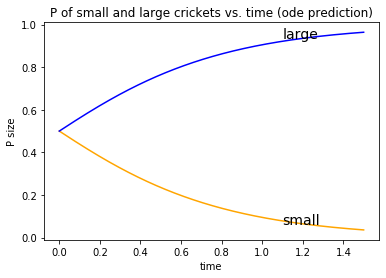

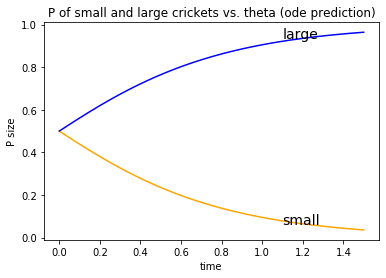

In [35]:
# Your code here
#problem 1
from scipy.integrate import odeint

F=np.array([[5,1],[8,3]])  # fitness matrix

def f(n,t):
    return (n*np.dot(F,n)/sum(n)/1.)
ninit=[4,4]    # initial [number of small crickets, number of large crickets]
time=np.linspace(0.0,1.5, 1000)

n=odeint(f,ninit,time)
theta=n/(np.array([n.sum(axis=1),n.sum(axis=1)]).transpose())
plt.plot(time,theta[:,0],'orange')
plt.plot(time,theta[:,1],'blue')
plt.xlabel('time')
plt.text(1.1,theta[800,0], r'small',fontsize=14)
plt.text(1.1,theta[800,1], r'large',fontsize=14)
plt.ylabel('P size')
plt.title("P of small and large crickets vs. time (ode prediction)")
plt.figure()

def f4(the,t):
    length=len(the)
    one=np.ones(length)
    Fthe=np.dot(F,the)
    theFthe=np.dot(the.transpose(),Fthe)
    onetheFthe=np.dot(one,theFthe)
    return the*(Fthe-onetheFthe)


time=np.linspace(0.0,1.5, 1000)
theinit=[0.5,0.5]


the=odeint(f4,theinit,time)
plt.plot(time,the[:,0],'orange')
plt.plot(time,the[:,1],'blue')
plt.xlabel('time')
plt.text(1.1,the[800,0], r'small',fontsize=14)
plt.text(1.1,the[800,1], r'large',fontsize=14)
plt.ylabel('P size')
plt.title("P of small and large crickets vs. theta (ode prediction)")

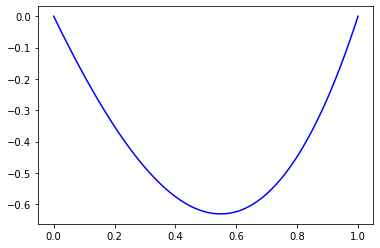

In [44]:
#problem 2
def h(the0):
    the=[the0,1-the0]
    length=len(the)
    one=np.ones(length)
    Fthe=np.dot(F,the)
    theFthe=np.dot(the,Fthe)
    onetheFthe=np.dot(one,theFthe)
    return (the*(Fthe-onetheFthe))[0]

the0=np.linspace(0,1,1000)
plt.plot(the0,list(map(h,the0)),'blue')


__Answer:__ 0 and 1 are zeros of h, 0 is stabe


**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>** 

The overall behavior in evolutionary games depends heavily on the fitness matrix $F.$   Another choice of $F$ corresponds to the so-called doves and hawks evolution game, for which the fitness matrix is
$$\begin{array}{c|cc}  & dove & hawk  \\ \hline
    dove & 3 & 1  \\
    hawk & 5 & 0
    \end{array}$$
or by a fitness matrix
$$F=\left( \begin{array}{cc}  3 & 1 \\ 5 & 0  \end{array}\right).$$   Think of the doves and hawks as two types of birds that need to share resources, such as food.  (The hawks are so aggressive that they attack the doves).  A dove has higher fitness, 3, against another dove than against a hawk, 1.  A hawk has a high fitness against a dove (5) but zero fitness against another hawk, because the hawks fight over their resources.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 5:</SPAN>** 

1. Repeat the deterministic (ode) approach above, but now for the doves and hawks evolution game.   You can use either the random or deterministic evolution equations for the numerical analysis.   
2. Comment and verify your assertions about equilibrium behavior by finding a differential equation for $\theta[0]$ and exploring its equilbrium points and their stability.

Text(0.5, 1.0, 'Numbers of small and large crickets vs. time (ode prediction)')

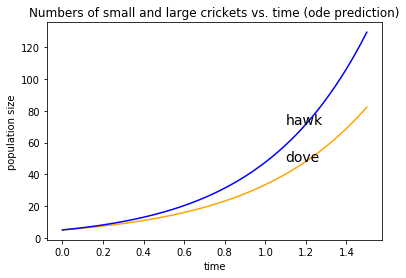

In [45]:
# Your code here
#problem 1
F=np.array([[3,1],[5,0]])
def f(n,t):
    return (n*np.dot(F,n)/sum(n)/1.)

ninit=[5,5] 
time=np.linspace(0.0,1.5, 1000)
n=odeint(f,ninit,time)

plt.plot(time,n[:,0],'orange')
plt.plot(time,n[:,1],'blue')
plt.xlabel('time')
plt.text(1.1,n[800,0], r'dove',fontsize=14)
plt.text(1.1,n[800,1], r'hawk',fontsize=14)
plt.ylabel('population size')
plt.title("Numbers of small and large crickets vs. time (ode prediction)")

0.3333333333333333


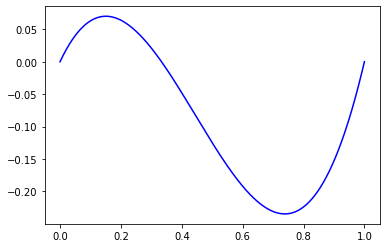

In [55]:
#problem 2
def h(the0):
    the=[the0,1-the0]
    length=len(the)
    one=np.ones(length)
    Fthe=np.dot(F,the)
    theFthe=np.dot(the,Fthe)
    onetheFthe=np.dot(one,theFthe)
    return (the*(Fthe-onetheFthe))[0]

the0=np.linspace(0,1,1000)
plt.plot(the0,list(map(h,the0)),'blue')
dis=float('inf')
zero=0
for the in the0:
    if the!=0 and zero!=1 :
        if abs(h(the))<dis:
            dis=abs(h(the))
            zero=the
print(zero)
        

__Answer__: equilibrium points are 0,0.3333333,1; only 0.3333333 is stable.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 5</SPAN>** 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 6:</SPAN>**  Find a 3x3 fitness matrix $F$ and an initial condition for an evolutionary game with three types of individuals such that the solution $\theta$ has a limit cycle, not just converging to a limit point.  Does the limit cycle depend on the intial state for your fitness matrix?  

Hint 1: Adapt the code you wrote for Problem 4.

Hint 2: Solve this problem by trial and error, i.e. trying different values of the entries in the fitness matrix. Think of the three types of individuals as three kinds of animals. What kind of relationship among these three animals would likely to cause an oscillating population for each animal?

Text(0.5, 1.0, 'P with initial (0.4,0.4,0.2)')

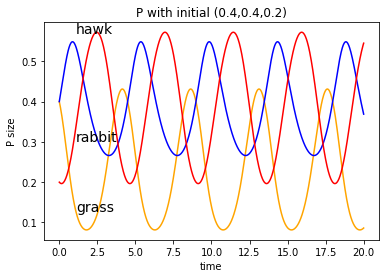

In [72]:
# Your code here
F=np.array([[5,0,5],[5,5,0],[0,8,0]])
def f5(the,t):
    length=len(the)
    one=np.ones(length)
    Fthe=np.dot(F,the)
    theFthe=np.dot(the.transpose(),Fthe)
    onetheFthe=np.dot(one,theFthe)
    return the*(Fthe-onetheFthe)


time=np.linspace(0.0,20, 1000)
theinit=[0.4,0.4,0.2]
the=odeint(f5,theinit,time)
plt.plot(time,the[:,0],'orange')
plt.plot(time,the[:,1],'blue')
plt.plot(time,the[:,2],'red')
plt.xlabel('time')
plt.text(1.1,the[800,0], r'grass',fontsize=14)
plt.text(1.1,the[800,1], r'rabbit',fontsize=14)
plt.text(1.1,the[800,2], r'hawk',fontsize=14)
plt.ylabel('P size')
plt.title("P with initial (0.4,0.4,0.2)")




Text(0.5, 1.0, 'P with initial (0.4,0.4,0.2)')

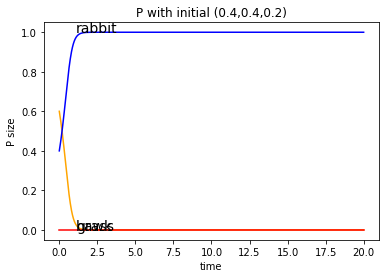

In [74]:
time=np.linspace(0.0,20, 1000)
theinit=[0.6,0.4,0]
the=odeint(f5,theinit,time)
plt.plot(time,the[:,0],'orange')
plt.plot(time,the[:,1],'blue')
plt.plot(time,the[:,2],'red')
plt.xlabel('time')
plt.text(1.1,the[800,0], r'grass',fontsize=14)
plt.text(1.1,the[800,1], r'rabbit',fontsize=14)
plt.text(1.1,the[800,2], r'hawk',fontsize=14)
plt.ylabel('P size')
plt.title("P with initial (0.6,0.4,0)")



__Answer__: 
yes, the limit cycle depend on the initial state,as for second graph i turn the third special to zero, cycle will disappear as the ecological balance has been destroyed<br>
I consider the relationship as A-grass, B-rabbit and C-hawk,rabbit eat grass so when they meet, rabbit increase very much and grass increase very little(0),they are Predator-prey relationships, as well as hawk and rabbit; and for grass and hawk, they are Mutual relationship.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 6</SPAN>** 

For this week's lab, please answer all questions 1-6.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 